In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

In [2]:
np.set_printoptions(precision=8)

### $\beta$-scaling (but the original estimator)

In [3]:
ℓ = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
y = np.array([0.2004848711474414, 0.46772941806694773, 0.743051240612918, 1.0205679212943068, 1.3013113128075393, 1.5816157914216589, 1.8565756364309194, 2.1293099660543886, 2.393555008900057, 2.6434445944958163, 2.9633562493320627, 3.1986001880130708, 3.510892653464696, 3.76276662330894, 4.03781989251193, 4.291940354899299, 4.5388918574911985, 4.7666776863437015, 5.010169230181372, 5.229864000054734])
y_err = np.array([0.000735878560194893, 0.0014575911161294744, 0.0021872379586126926, 0.0029936086307045325, 0.0037973577489236977, 0.003558474179699982, 0.0030018775632098932, 0.005021372810019892, 0.00949112042247591, 0.03865236734251167, 0.008708041632350982, 0.02251932398320645, 0.0031341619979377024, 0.004687983315639224, 0.007585993987146597, 0.01624122060056763, 0.01921094307327244, 0.013728648995504375, 0.012275231771272382, 0.012472398240056035])

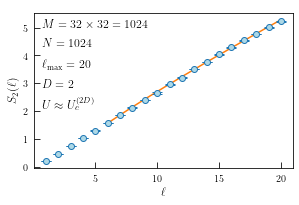

In [4]:

with plt.style.context('../IOP_large.mplstyle'):

    fig,ax1 = plt.subplots()
    
    ax1.errorbar(ℓ,y,y_err, fmt='.', capsize=5,label='square',marker='o',mfc="lightblue");
    ax1.set_ylabel(r'$S_2(\ell)$')
    ax1.set_xlabel(r'$\ell$')
    ax1.tick_params(direction='in')
    
    # Annotate system information
    ax1.annotate(r"$M=32\times32=1024$",(0.14,0.52+.35),
                xycoords='figure fraction')
    ax1.annotate(r"$N=1024$",(0.14,0.52+.25),
                xycoords='figure fraction')
    ax1.annotate(r"$\ell_{\rm{max}}=20$",(0.14,0.52+.15),
                xycoords='figure fraction')
    ax1.annotate(r"$D=2$",(0.14,0.52+.05),
                xycoords='figure fraction')
    ax1.annotate(r"$U \approx U_c^{(2D)}$",(0.14,0.52-.05),
                xycoords='figure fraction')
    
    # Define linear function for fitting
    def boundary_law_fit(x,a,c,d):
        return a*x + c*np.log(x) + d
    
    # Perform the linear fit
    popt_line,pcov_line=scipy.optimize.curve_fit(boundary_law_fit,ℓ[5:],y[5:],sigma=y_err[5:],p0=[1,1,1])
    
    # Extract fit parameters and their error
    a,c,d = popt_line
    a_err,c_err,d_err = np.sqrt(np.diag(pcov_line))
    
    # Plot the fit
    ℓ_fit = np.linspace(ℓ[5],max(ℓ),1000)
    y_fit = boundary_law_fit(ℓ_fit,a,c,d)
    ax1.plot(ℓ_fit[:],y_fit[:],zorder=0)
    
    # Save figure
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/boundaryLaw_N1024.pdf",dpi=400)
    plt.savefig("boundaryLaw_N1024.png",dpi=400)
    

### $S_2 / \ell$ vs. $\ell$

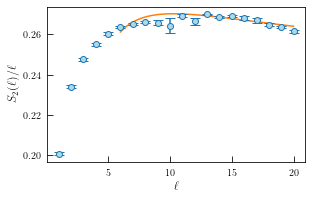

In [10]:
with plt.style.context('../IOP_large.mplstyle'):

    fig,ax1 = plt.subplots()
    
    ax1.errorbar(ℓ,y/ℓ,y_err/ℓ, fmt='.', capsize=5,label='square',marker='o',mfc="lightblue");
    ax1.set_ylabel(r'$S_2(\ell)/\ell$')
    ax1.set_xlabel(r'$\ell$')
    ax1.tick_params(direction='in')
    
    # Annotate system information
#     ax1.annotate(r"$M=32\times32=1024$",(0.14,0.52+.35),
#                 xycoords='figure fraction')
#     ax1.annotate(r"$N=1024$",(0.14,0.52+.25),
#                 xycoords='figure fraction')
#     ax1.annotate(r"$\ell_{\rm{max}}=20$",(0.14,0.52+.15),
#                 xycoords='figure fraction')
#     ax1.annotate(r"$D=2$",(0.14,0.52+.05),
#                 xycoords='figure fraction')
#     ax1.annotate(r"$U \approx U_c^{(2D)}$",(0.14,0.52-.05),
#                 xycoords='figure fraction')
    
    # Define linear function for fitting
    def boundary_law_fit(x,a,c,d):
        return a*x + c*np.log(x) + d
    
    # Perform the linear fit
    popt_line,pcov_line=scipy.optimize.curve_fit(boundary_law_fit,ℓ[5:],y[5:],sigma=y_err[5:],p0=[1,1,1])
    
    # Extract fit parameters and their error
    a,c,d = popt_line
    a_err,c_err,d_err = np.sqrt(np.diag(pcov_line))
    
    # Plot the fit
    ℓ_fit = np.linspace(ℓ[5],max(ℓ),1000)
    y_fit = boundary_law_fit(ℓ_fit,a,c,d)
    ax1.plot(ℓ_fit[:],y_fit[:]/ℓ_fit,zorder=0)
    
    # Save figure
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/boundaryLaw_N1024_overEll.pdf",dpi=400)
    plt.savefig("boundaryLaw_N1024_overEll.png",dpi=400)